<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Canny - Github issue update
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Canny/Canny_Github_issue_update.ipynb" target="_parent"><img src="https://img.shields.io/badge/-Open%20in%20Naas-success?labelColor=000000&logo="/></a>

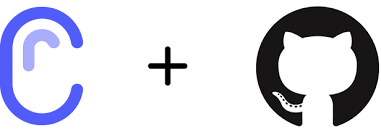

In [1]:
#pip install PyGithub

## Pre-requisite - Import packages

In [2]:
import requests
import json
from github import Github

## Step 1 - Insert your accounts details

In [3]:
# For Github 
gihub_personal_token = "**********"                               # Settings/Developer settings/Personal access tokens
github_repo = "optimusprime2021/api-tester"                       # Github repository name

# For Canny
canny_post_url = "https://canny.io/api/v1/posts/list"             # Canny post url
canny_apikey = "**********"                                       # Canny api key

#### Input api-keys 

## Step 2 - Get Canny posts Dataframe

### Retrieve posts

In [4]:
response = requests.get(canny_post_url)
data = {"apiKey":canny_apikey,"id":"","limit":"100"}
response = requests.post(canny_post_url,data)
post_details = response.json()

## Step 3 - Check connection status

In [5]:
if response.status_code == 200:
    print("Successfully connected to Canny")
elif response.status_code == 404:
    print("Couldn't connect to Canny, Please check the credentials")
    exit()

## Step 4 - Generating dataframe

In [6]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
dd = post_details['posts']
df = pd.DataFrame(columns = dd[0].keys()) 
for i in range(len(dd)):
    df = df.append(dd[i], ignore_index=True)
# df

board = []
category = []
tags = []
for i in range(len(df)):
    board.append(df['board'][i]['name'])
    if not df['category'][i]:
        category.append('Not assigned')
    else:
        category.append(df['category'][i]['name'])    
    if not df['tags'][i]:
        tags.append('Not assigned')
    else:
        tags.append(df['tags'][i][0]['name'])
        
        
df = df[['title','status','details','url']]
df['board'] = board
df['category'] = category
df['tags'] = tags
df = df[(df["tags"] == "Awesome-notebooks")]          # tag name
df

In [7]:
## add url to dataframe

## Step 6 - Existing issue list

In [8]:
issues = []
g = Github(gihub_personal_token)
repo = g.get_repo(github_repo)
open_issues = repo.get_issues(state='open')
for issue in open_issues:
    issues.append(issue.title)

## Step 7 - Push all issues

In [9]:
repo = g.get_repo(github_repo)
for i in df.index:
    if df['title'][i] not in issues:
        repo.create_issue(title=df['title'][i], body=df['details'][i]+"\n canny url: "+df['url'][i])

## Close all issues

In [10]:
# repo = g.get_repo(github_repo)
# open_issues = repo.get_issues(state='open')
# for issue in open_issues:
#     issue.edit(state='closed')